In [1]:
import numpy as np
from scipy.stats import rv_discrete
from matplotlib import pyplot as plt
import cvxpy as cp
import pickle
# import gurobipy

In [2]:
import utils
def run_extremes(N, W, pmf_cust, pmf_serv, gurobi_flag = 1):
    Ex = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    print("Expected cost for c = 0 case:", Ex )
    if gurobi_flag == 1:
        fluid_sol = utils.fluid_solution_gurobi(N, W, pmf_cust, pmf_serv)
    else:
        fluid_sol = utils.fluid_solution(N, W, pmf_cust, pmf_serv)
#     print("\nFluid Solution:\n")
#     print(fluid_sol)
    return([Ex,fluid_sol])
def plot_from_sim_paths(file_name, save_file= 0, frac = 0):
    with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
    Q_paths_M = M_res["Q_paths"]
    C_paths_M = M_res["C_paths"]
    Q_paths_B = B_res["Q_paths"]
    C_paths_B = B_res["C_paths"]
    (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M, frac)
    (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B, frac)
    [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    utils.qc_plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M, save_file)

In [11]:
def plot_from_sim_paths_steps(file_name, steps = 10**5, save_file= 0, frac = 0):
    with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
    [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    Q_paths_M = np.asarray( M_res["Q_paths"] )
    C_paths_M = np.asarray( M_res["C_paths"] )
    Q_paths_B = np.asarray( B_res["Q_paths"] )
    C_paths_B = np.asarray( B_res["C_paths"] )
    QPM = Q_paths_M[:,0:steps]
    CPM = C_paths_M[:,0:steps]
    QPB = Q_paths_B[:,0:steps]
    CPB = C_paths_B[:,0:steps]
    (average_cost_M, average_queue_M) = utils.average_paths(CPM,QPM, frac)
    (average_cost_B, average_queue_B) = utils.average_paths(CPB,QPB, frac)
    utils.qc_plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M)
def comparison_plot(file_name, steps = 10**4, frac = 0, save_file = 0):
    with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
        
    Ex = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    fluid_sol = {'Cost':0}
    
    Q_paths_M = np.asarray( M_res["Q_paths"] )
    C_paths_M = np.asarray( M_res["C_paths"] )
    Q_paths_B = np.asarray( B_res["Q_paths"] )
    C_paths_B = np.asarray( B_res["C_paths"] )
    
    QPM = Q_paths_M[:,0:steps]
    CPM = C_paths_M[:,0:steps]
    QPB = Q_paths_B[:,0:steps]
    CPB = C_paths_B[:,0:steps]
    (avg_C_M, avg_Q_M) = utils.average_paths(CPM,QPM, frac)
    (avg_C_B, avg_Q_B) = utils.average_paths(CPB,QPB, frac)
    # [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    
    plt.figure( figsize=(20,6) ) 
    plt.subplot(1,2,1)
    plt.grid(True)
    ylim = max( max( avg_Q_B ), max( avg_Q_M ) )
    plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
    # Batching data
    plt.plot(avg_C_B,avg_Q_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
    # Max Weight data
    plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
    plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
    plt.ylabel("Average queue length", weight='bold',fontsize=12)
    plt.xlabel("Average cost", weight='bold',fontsize=12)
    plt.title("Reduced steps", weight='bold',fontsize=15)
    plt.legend(['Fluid', 'Batching', 'Max-weight', 'c = 0 sol'])
    
    print("old MW", avg_C_M)
    print("old B", avg_C_B)
    
    (avg_C_M, avg_Q_M) = utils.average_paths(C_paths_M,Q_paths_M, frac)
    (avg_C_B, avg_Q_B) = utils.average_paths(C_paths_B,Q_paths_B, frac)
    plt.subplot(1,2,2)
    ylim = max( max( avg_Q_B ), max( avg_Q_M ) )
    plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
    
    # Batching data
    plt.plot(avg_C_B,avg_Q_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
    plt.grid(True)
    # Max Weight data
    plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
    plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
    plt.ylabel("Average queue length", weight='bold',fontsize=12)
    plt.xlabel("Average cost", weight='bold',fontsize=12)
    plt.title("Original", weight='bold',fontsize=15)
    plt.legend(['Fluid', 'Batching', 'Max-weight', 'c = 0 sol'])
    
    print("new MW", avg_C_M)
    print("new B", avg_C_B)
    if save_file:
        plt.savefig(save_file, bbox_inches='tight')
    plt.show()

old MW [1.99988259 2.00989822 2.00279914 1.96409735 1.60554493 1.50736767
 1.47236635 1.48211621 1.30944448 1.26428269 1.10453696 1.03837553
 0.87874156 0.76548124 0.60071617 0.53290121 0.50491484 0.39863559
 0.29938297 0.28637287 0.23654652 0.19680558 0.12780437 0.10752082
 0.07864802]
old B [2.0217562  1.68402559 1.47983253 1.34770362 1.24089713 1.02828553
 0.9348775  0.85024885 0.78807817 0.72678596 0.68265415 0.55955585
 0.48576534 0.43980616 0.40640808 0.31304709]
new MW [2.01174951 2.00922198 2.00830521 1.9736519  1.61168591 1.50815141
 1.47329213 1.47366588 1.30961199 1.2631656  1.09109024 1.04415886
 0.87294756 0.7717828  0.61002802 0.52157028 0.49876005 0.41084954
 0.31309898 0.28994747 0.24091396 0.18819564 0.1493094  0.11199577
 0.07514648]
new B [2.00991051 1.68332761 1.48403659 1.34156243 1.24045338 1.0256397
 0.93102868 0.85713537 0.77630565 0.71512577 0.67593984 0.55538082
 0.48697505 0.43721491 0.39512452 0.30659661]


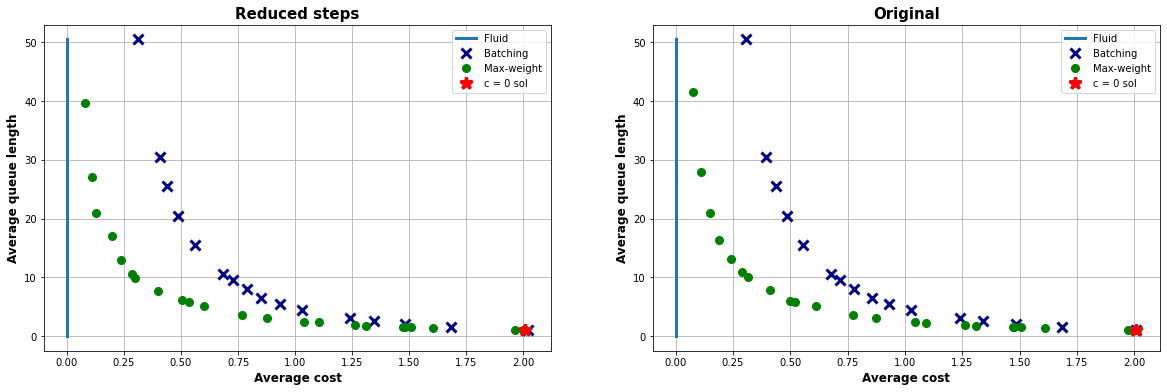

In [12]:
comparison_plot('../sim_paths_spatial_uniform_16.pkl',10**4, 0, '../../plots_stash/reduced-steps.jpg')

Expected cost for c = 0 case: 2.008
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 32 rows, 256 columns and 512 nonzeros
Model fingerprint: 0xfde4cdc7
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [6e-02, 6e-02]
Presolve time: 0.03s
Presolved: 32 rows, 256 columns, 512 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.03 seconds (0.00 work units)
Optimal objective  0.000000000e+00
Objective Value: 0.00
x:  [[0.0625 0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.    ]
 [0.     0.0625 0.     0.     0.     0.     0.     0.     0.     

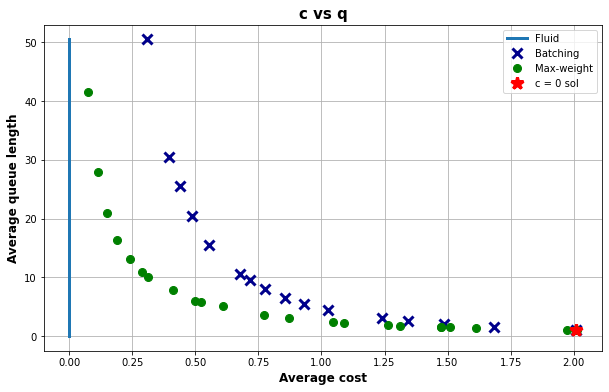

In [5]:
plot_from_sim_paths_steps('../sim_paths_spatial_uniform_16.pkl')

In [6]:
file_name = '../sim_paths_spatial_4_more_maxweight.pkl'

Expected cost for c = 0 case: 2.046
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 32 rows, 256 columns and 512 nonzeros
Model fingerprint: 0x6c0eaa24
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-03, 2e-01]
Presolve time: 0.02s
Presolved: 32 rows, 256 columns, 512 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   6.438740e-01   0.000000e+00      0s
      21    4.7543473e-01   0.000000e+00   0.000000e+00      0s

Solved in 21 iterations and 0.16 seconds (0.00 work units)
Optimal objective  4.754347292e-01
Objective Value: 0.48
x:  [[0.01109994 0.00939293 0.         0.         0.         0.
  0.         0.         0.01212069 0.         0.     

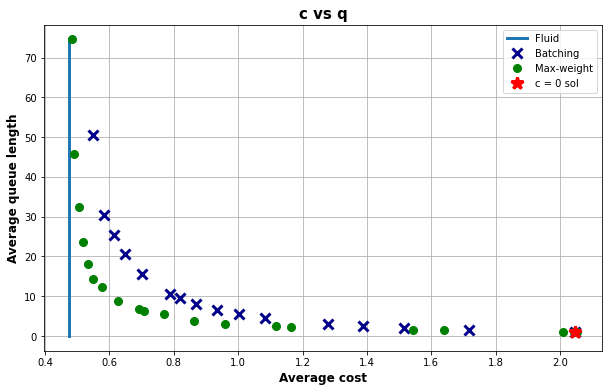

In [7]:
plot_from_sim_paths(file_name)

Expected cost for c = 0 case: 2.046
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 32 rows, 256 columns and 512 nonzeros
Model fingerprint: 0x6c0eaa24
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-03, 2e-01]
Presolve time: 0.00s
Presolved: 32 rows, 256 columns, 512 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   6.438740e-01   0.000000e+00      0s
      21    4.7543473e-01   0.000000e+00   0.000000e+00      0s

Solved in 21 iterations and 0.01 seconds (0.00 work units)
Optimal objective  4.754347292e-01
Objective Value: 0.48
x:  [[0.01109994 0.00939293 0.         0.         0.         0.
  0.         0.         0.01212069 0.         0.     

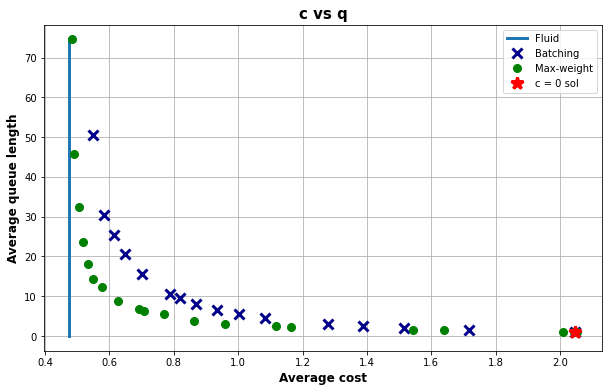

In [8]:
plot_from_sim_paths_steps(file_name)